# Audio Feature Analysis Overview

This notebook performs comprehensive audio analysis on the ESC-50 dataset, extracting and visualizing acoustic features across 10 selected sound classes.

## Dataset

The ESC-50 (Environmental Sound Classification) dataset contains 2000 environmental audio recordings organized into 50 classes. This analysis focuses on a subset of 10 classes with 40 samples each (400 total recordings):
- **Animal sounds**: dog, rooster
- **Nature sounds**: thunderstorms, sea_waves
- **Human sounds**: snoring, sneezing
- **Mechanical sounds**: clock_alarm, vacuum_cleaner, helicopter, siren

In [23]:
import pandas as pd
import yaml as yml
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import librosa.display
import os

In [8]:
with open("config.yml", "r") as f:
    config = yml.safe_load(f)

file_path = config["data_path"]
audio_path = config["audio_path"]

df = pd.read_csv(file_path)
df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [12]:
SELECTED_CLASSES = [
    'dog', 'rooster',
    'thunderstorm', 'sea_waves',
    'snoring', 'sneezing',
    'clock_alarm', 'vacuum_cleaner',
    'helicopter', 'siren'
]

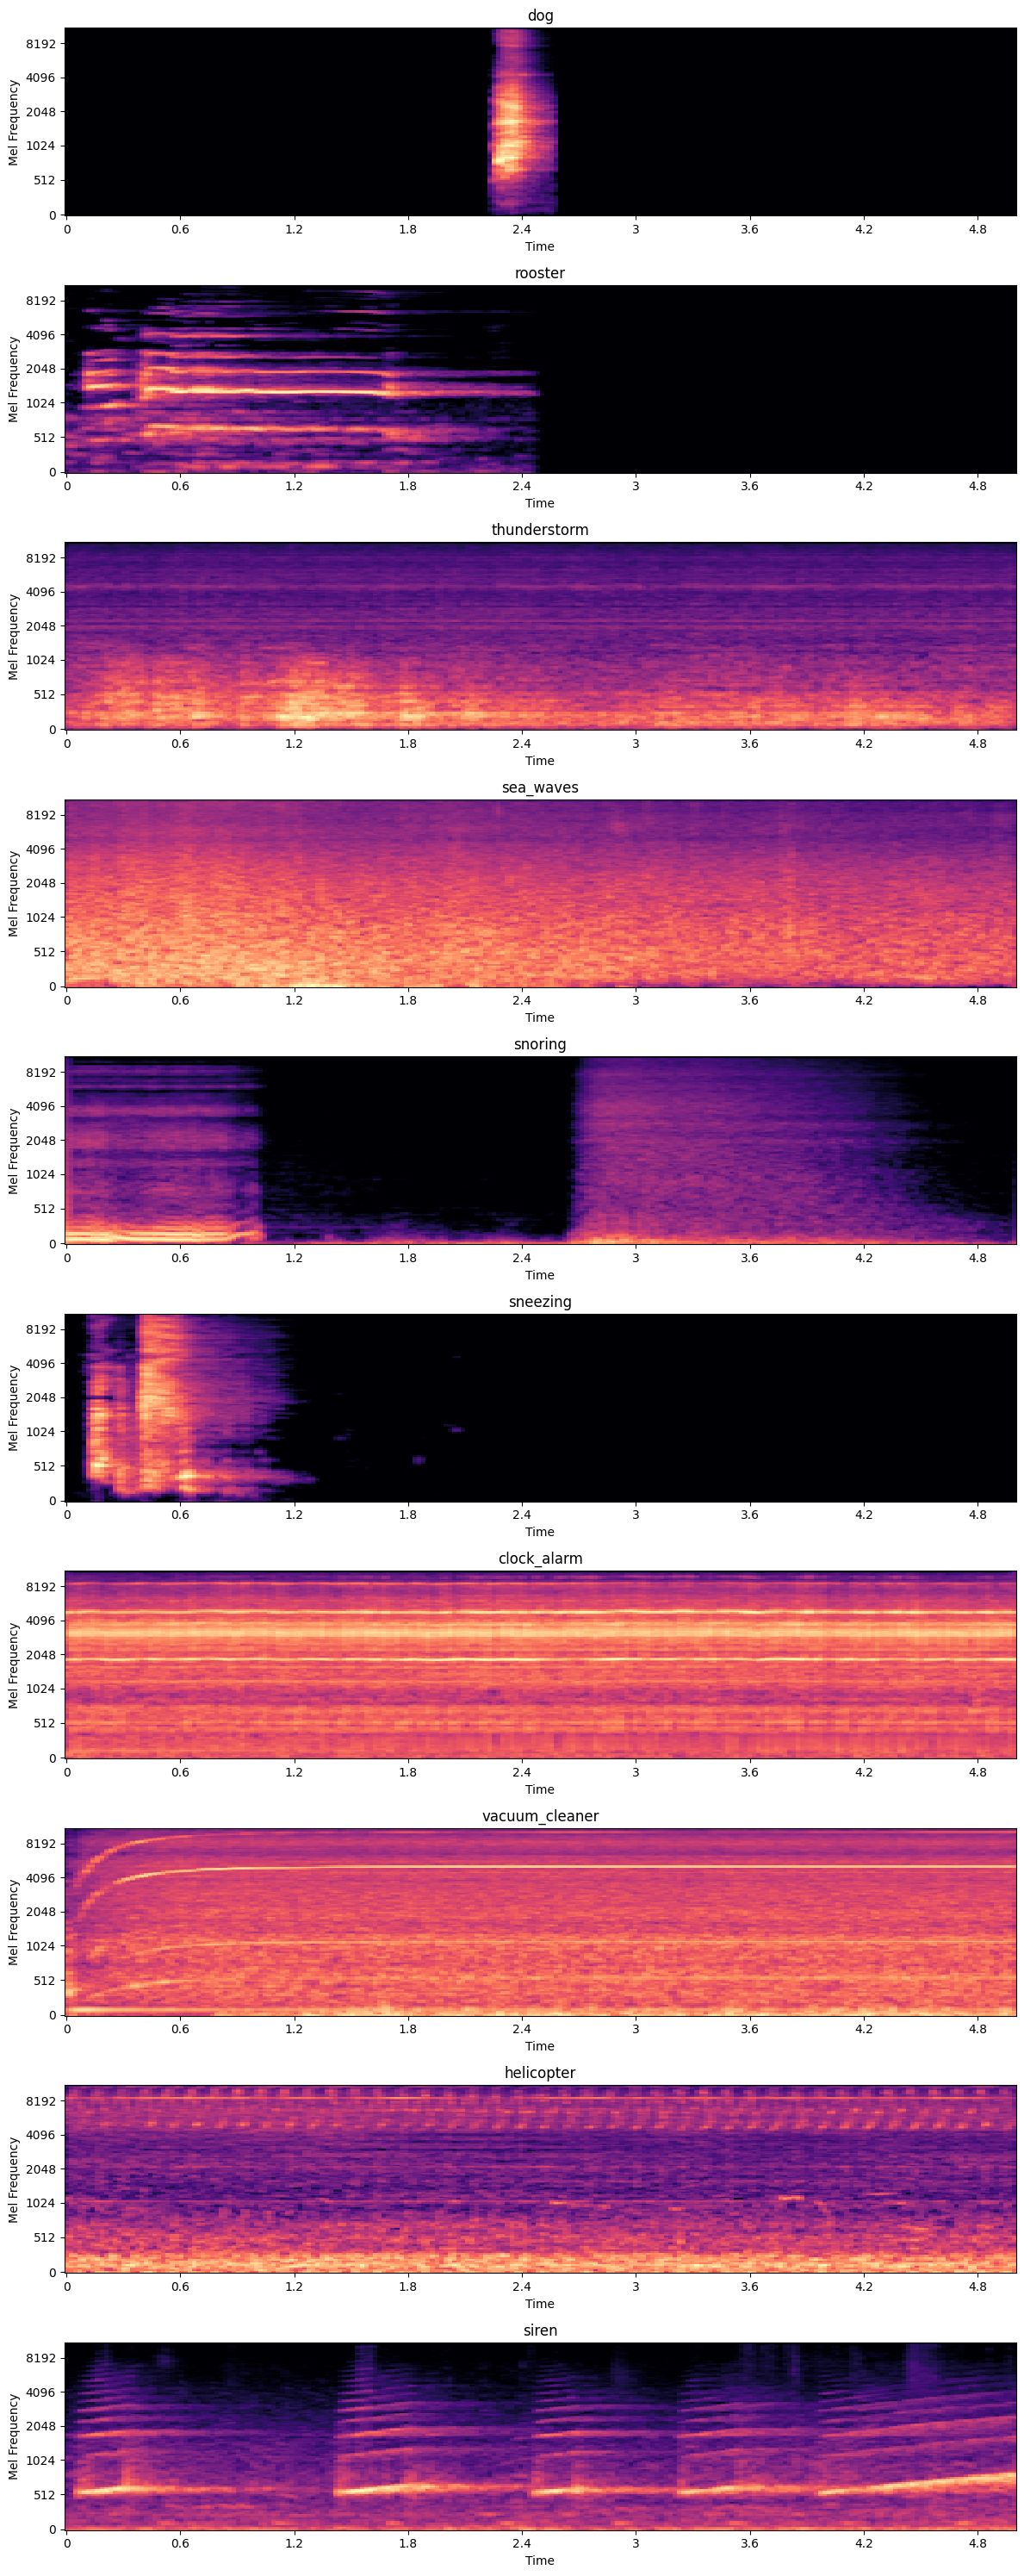

In [ ]:
fig, axes = plt.subplots(len(SELECTED_CLASSES), 1, figsize=(12, 3*len(SELECTED_CLASSES)))

for idx, class_name in enumerate(SELECTED_CLASSES):
    # Get first audio file for this class
    row = df[df['category'] == class_name].iloc[0]
    audio_file = f"{audio_path}\\{row['filename']}"
    
    y, sr = librosa.load(audio_file)
    
    # Compute spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_db = librosa.power_to_db(S, ref=np.max)
    
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', ax=axes[idx])
    axes[idx].set_title(f'{class_name}')
    axes[idx].set_ylabel('Mel Frequency')

plt.tight_layout()
plt.show()

## Mel Spectrograms

* A Mel Spectrogram is a visual representation of sound that shows how the  frequency content of an audio signal changes over time, using a frequency scale that matches human hearing perception.

* X-axis: Time (when sounds occur)
* Y-axis: Frequency (pitch - high notes vs low notes)
* Color/Intensity: Amplitude/Energy (how loud at each frequency)
Think of it as a "heat map" of sound - bright colors = strong energy at that frequency and time

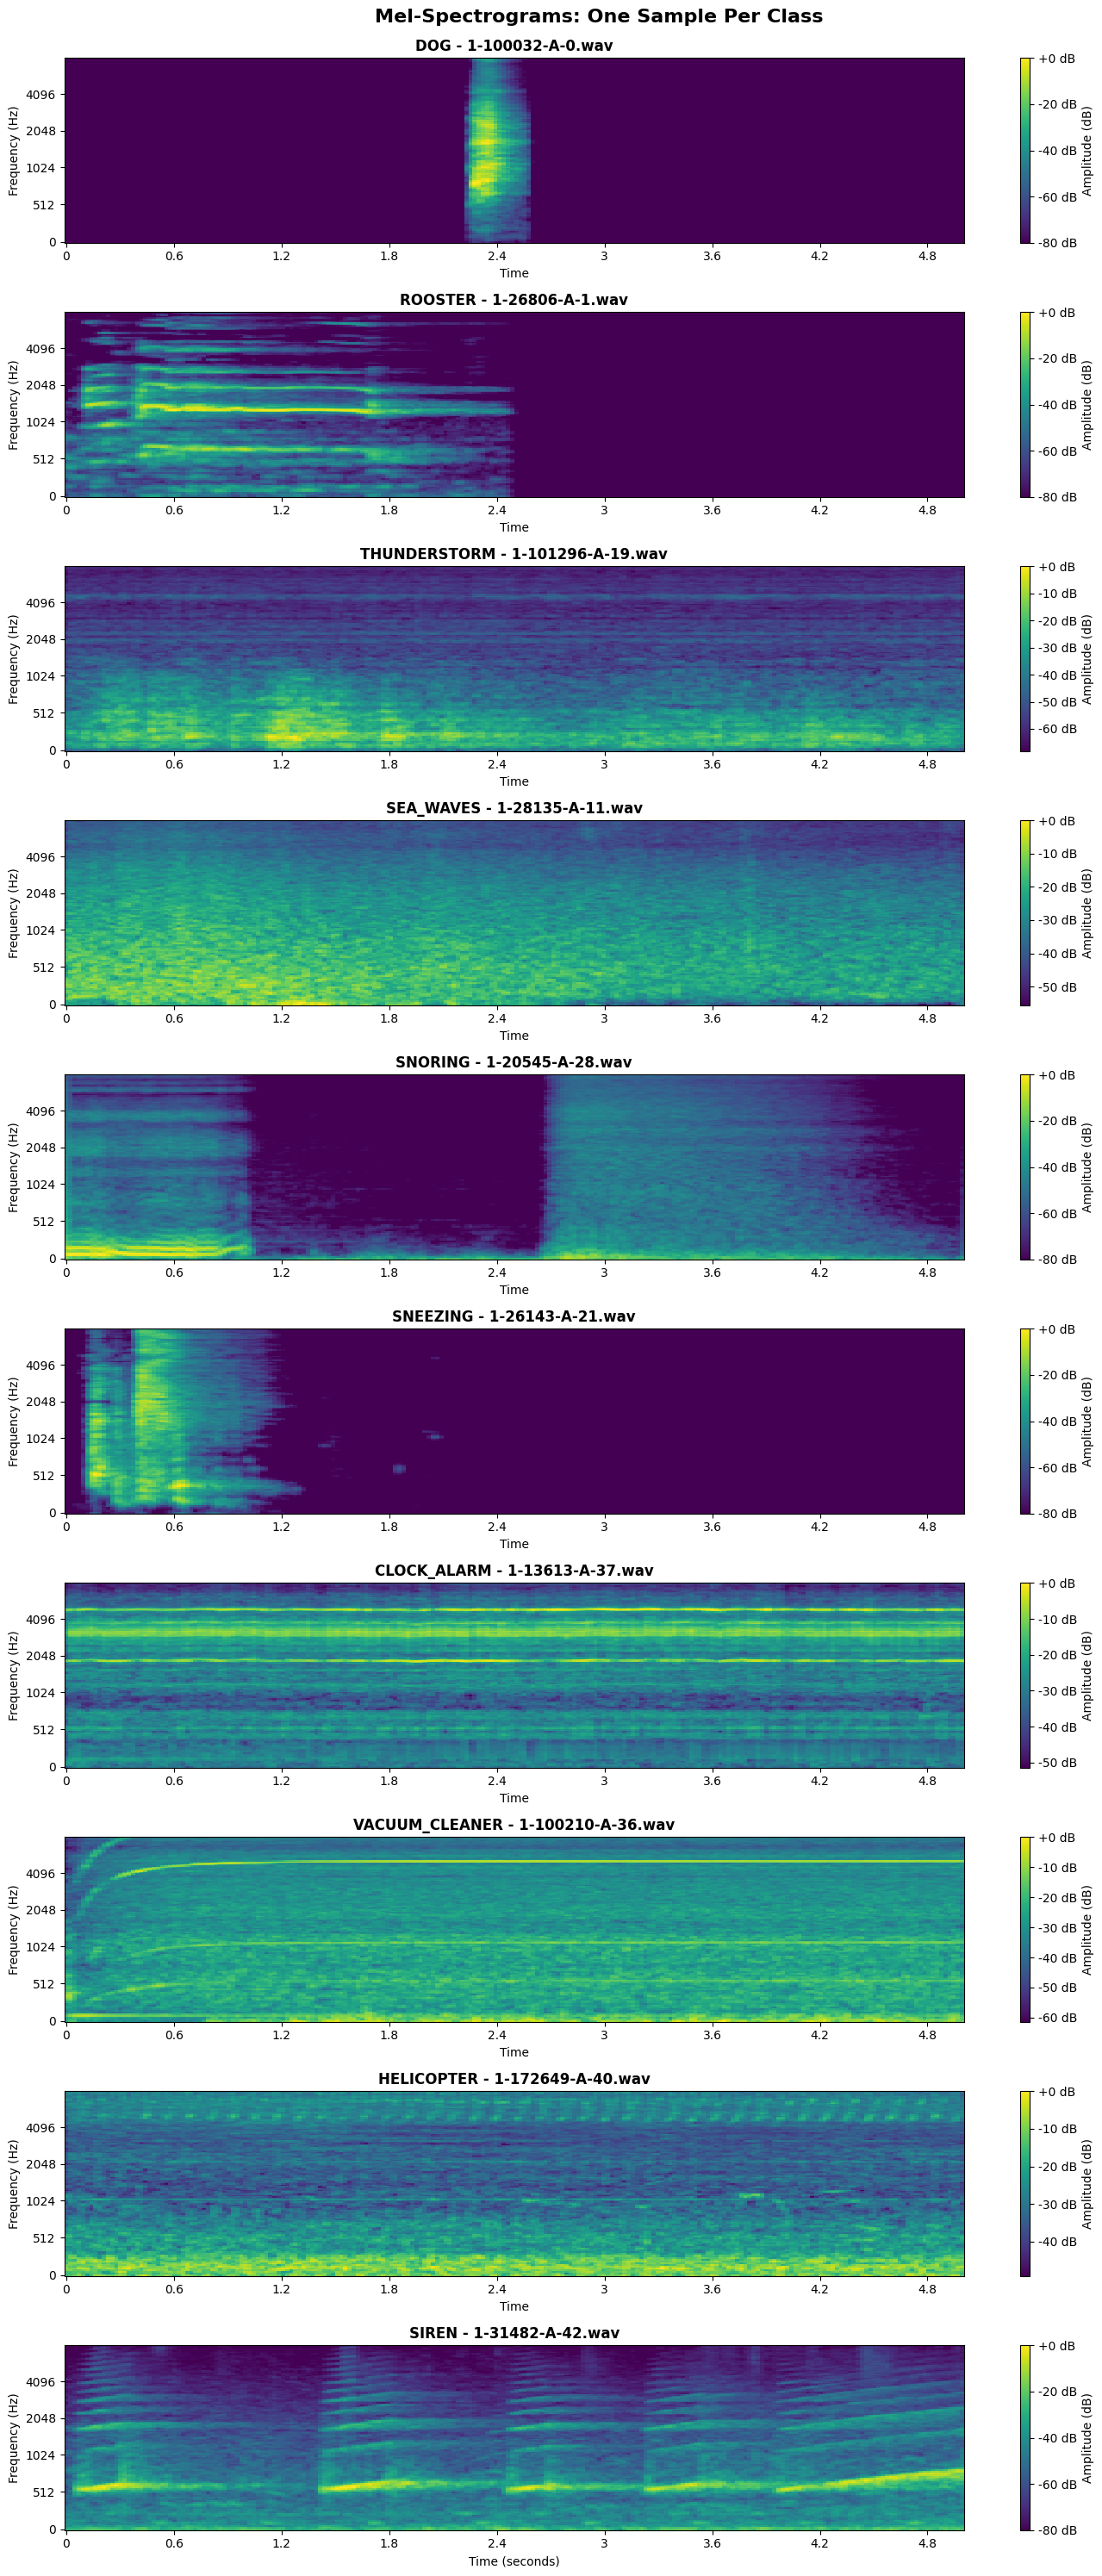

In [ ]:
fig, axes = plt.subplots(len(SELECTED_CLASSES), 1, figsize=(14, 3*len(SELECTED_CLASSES)))

for idx, class_name in enumerate(SELECTED_CLASSES):
    class_samples = df[df['category'] == class_name]
    
    if len(class_samples) == 0:
        print(f"Warning: No samples found for class '{class_name}'")
        continue
    
    row = class_samples.iloc[0]
    audio_file = os.path.join(audio_path, row['filename'])

    y, sr = librosa.load(audio_file, sr=22050)
    
    # Compute mel-spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_db = librosa.power_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', 
                                    ax=axes[idx], fmax=8000, cmap='viridis')
    axes[idx].set_title(f'{class_name.upper()} - {row["filename"]}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Frequency (Hz)', fontsize=10)
    
    cbar = plt.colorbar(img, ax=axes[idx], format='%+2.0f dB')
    cbar.set_label('Amplitude (dB)', fontsize=10)

axes[-1].set_xlabel('Time (seconds)', fontsize=10)
plt.suptitle('Mel-Spectrograms: One Sample Per Class', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## Understanding the plots

*Left Column (Waveforms): Shows how sound amplitude changes over time*

*Right Column (Spectrums): Shows the frequency content (pitch/tone) of the sound*

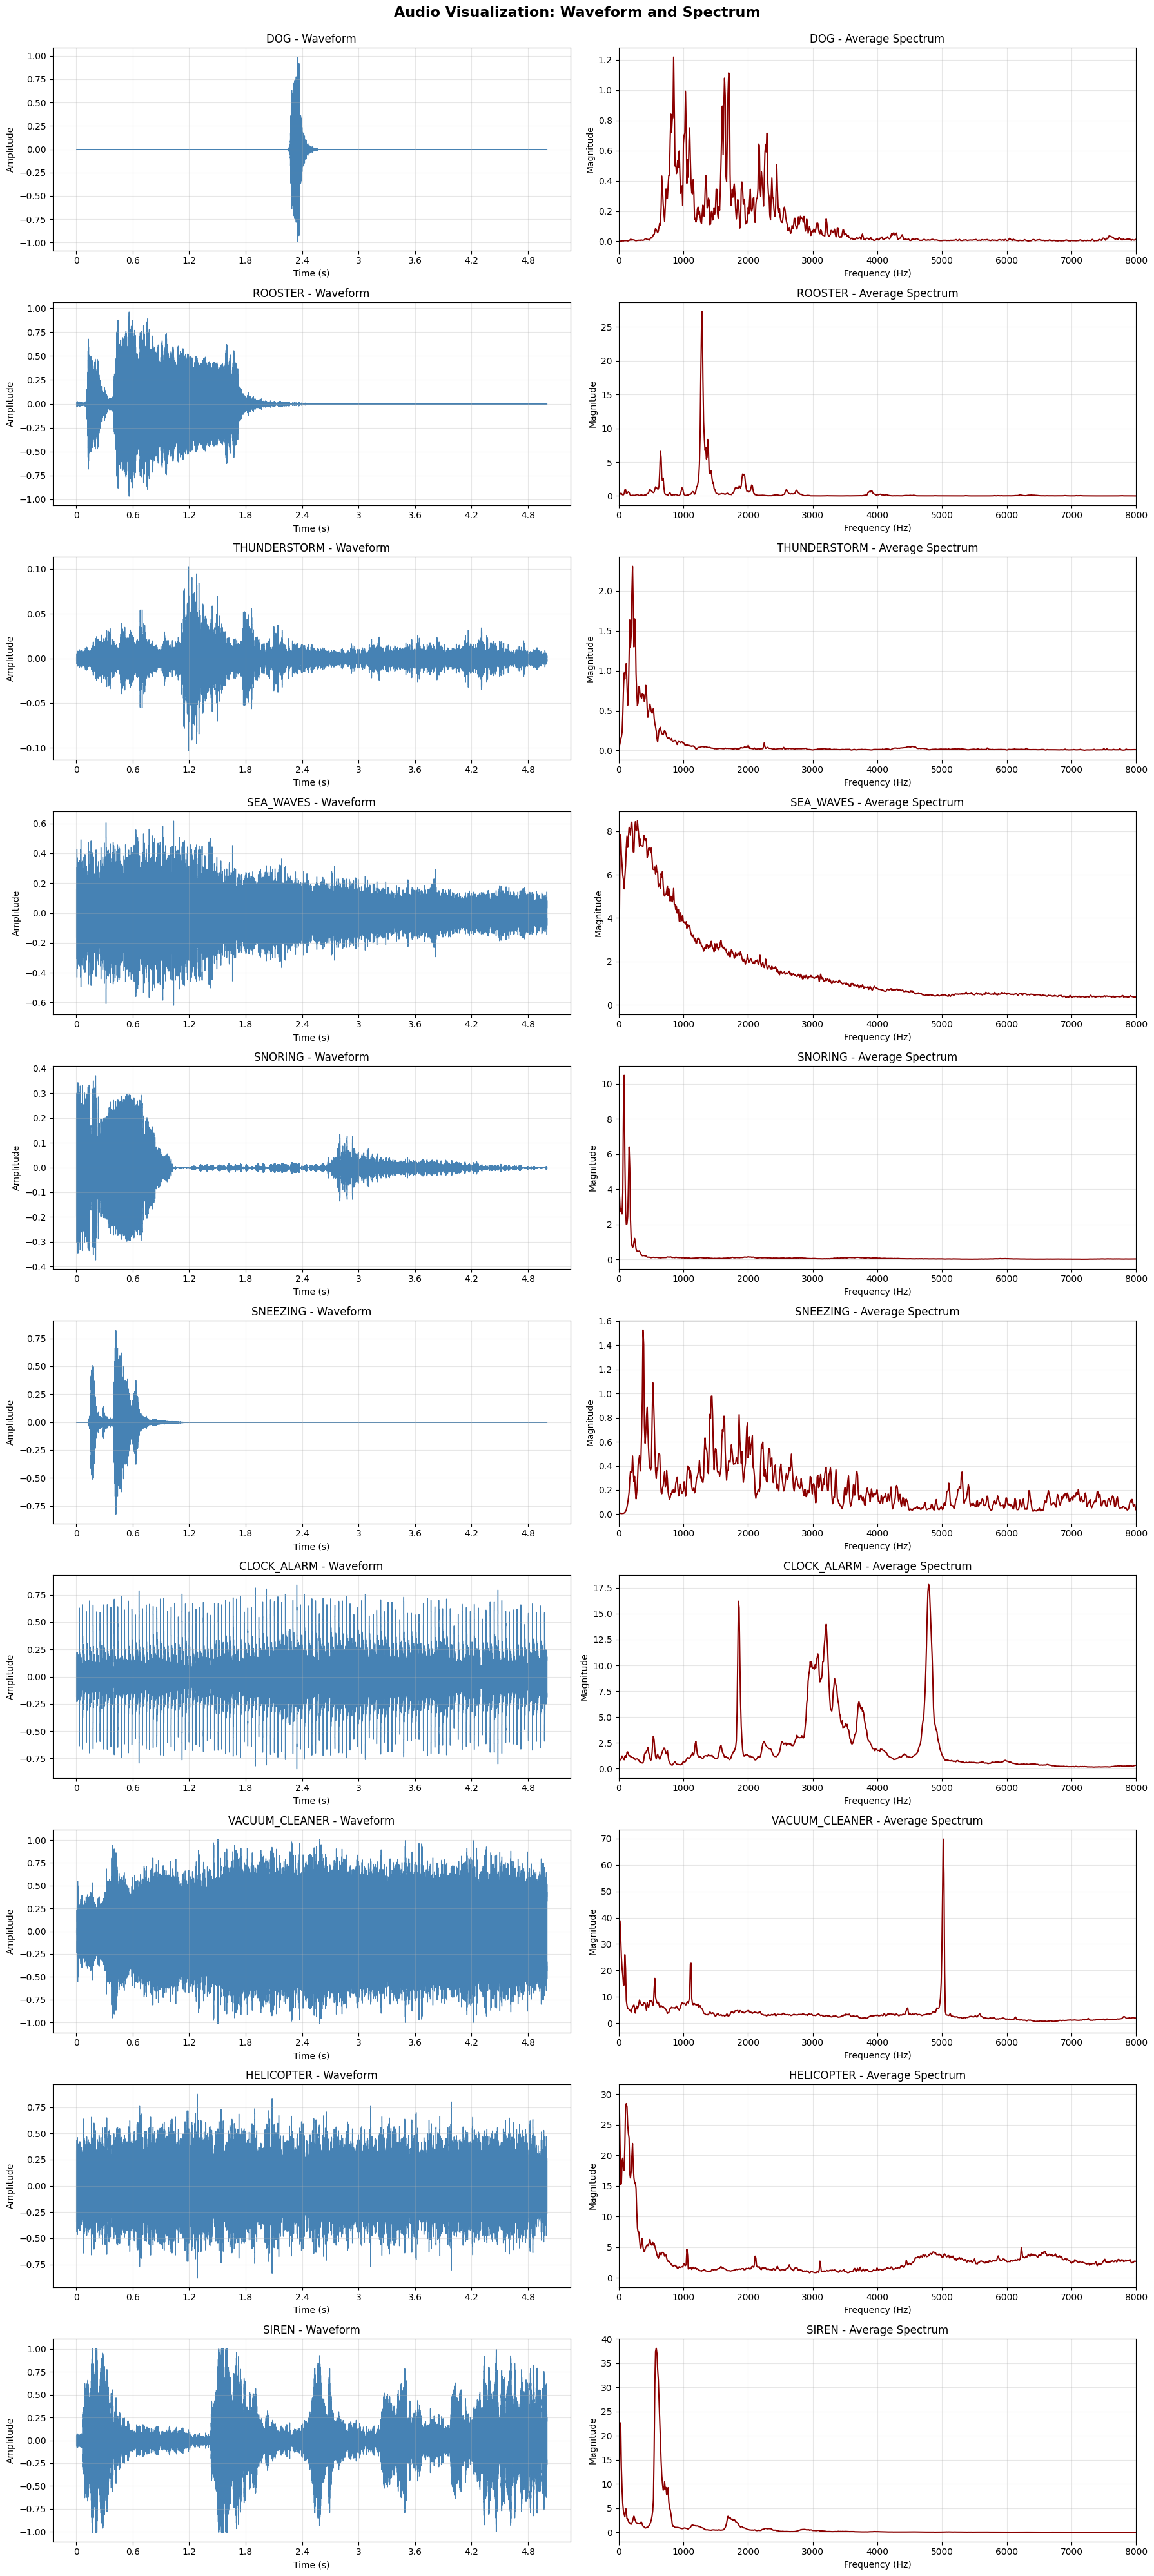

In [25]:
n_classes = len(SELECTED_CLASSES)
fig = plt.figure(figsize=(18, 4*n_classes))

for idx, class_name in enumerate(SELECTED_CLASSES):
    class_samples = df[df['category'] == class_name]
    
    if len(class_samples) == 0:
        continue
    
    row = class_samples.iloc[0]
    audio_file = os.path.join(audio_path, row['filename'])
    
    y, sr = librosa.load(audio_file, sr=22050)
    
    # Waveform
    ax1 = plt.subplot(n_classes, 2, idx*2 + 1)
    librosa.display.waveshow(y, sr=sr, ax=ax1, color='steelblue')
    ax1.set_title(f'{class_name.upper()} - Waveform')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Amplitude')
    ax1.grid(True, alpha=0.3)
    
    # Spectrum (average frequency content)
    ax3 = plt.subplot(n_classes, 2, idx*2 + 2)
    D = np.abs(librosa.stft(y))
    spectrum = np.mean(D, axis=1)
    freqs = librosa.fft_frequencies(sr=sr)
    ax3.plot(freqs, spectrum, color='darkred', linewidth=1.5)
    ax3.set_xlabel('Frequency (Hz)')
    ax3.set_ylabel('Magnitude')
    ax3.set_title(f'{class_name.upper()} - Average Spectrum')
    ax3.set_xlim([0, 8000])
    ax3.grid(True, alpha=0.3)

plt.suptitle('Audio Visualization: Waveform and Spectrum', 
             fontsize=16, fontweight='bold', y=0.998)
plt.tight_layout()
plt.show()